In [41]:
# Import neccesary library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from glob import glob

# Print the file in Kaggle Input
import warnings
warnings.filterwarnings('ignore')
import os
print('Research Dataset Upload in Kaggle')
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

Research Dataset Upload in Kaggle
/kaggle/input
/kaggle/input/wastemanagement
/kaggle/input/wastemanagement/Research Dataset
/kaggle/input/wastemanagement/Research Dataset/Test
/kaggle/input/wastemanagement/Research Dataset/Test/R
/kaggle/input/wastemanagement/Research Dataset/Test/O
/kaggle/input/wastemanagement/Research Dataset/Train
/kaggle/input/wastemanagement/Research Dataset/Train/R
/kaggle/input/wastemanagement/Research Dataset/Train/O


In [42]:
# Set Path to Get Train and Test Data 
train_path = "/kaggle/input/wastemanagement/Research Dataset/Train"
test_path = "/kaggle/input/wastemanagement/Research Dataset/Test"

In [43]:
# Preprocess and Categorize Train Data in Labels

x_train = [] 
y_train = [] 

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_train.append(img_array) 
        y_train.append(category.split("/")[-1])
        
train=pd.DataFrame({'image': x_train,'label': y_train})

# Preprocess and Categorize Test Data in Labels

x_test = [] 
y_test = [] 

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_test.append(img_array) 
        y_test.append(category.split("/")[-1])
        
test=pd.DataFrame({'image': x_test,'label': y_test})

100%|██████████| 500/500 [00:02<00:00, 213.24it/s]


In [45]:
# Get Train Data Structure Info
print('(Total Rows in Train Data, Columns)')
train.shape

(Total Rows in Train Data, Columns)


(20000, 2)

In [46]:
# Get Test Data Structure Info
print('(Total Rows in Test Data, Columns)')
test.shape

(Total Rows in Test Data, Columns)


(1000, 2)

In [47]:
# Number of Classes in Train Data
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Train Data Class: ",numberOfClass)

# Number of Classes in Test Data
className = glob(test_path + '/*' )
numberOfClass = len(className)
print("Number Of Test Data Class: ",numberOfClass)

Number Of Train Data Class:  2
Number Of Test Data Class:  2


In [49]:
# Get the Total Images for Each Class in Train Data
from collections import Counter
print('Train Data')
print('{Recyclable: Total Images, Organic: Total Images}')
Counter(y_train)

Train Data
{Recyclable: Total Images, Organic: Total Images}


Counter({'R': 10000, 'O': 10000})

In [50]:
# Get the Total Images for Each Class in Test Data
from collections import Counter
print('Test Data')
print('{Recyclable: Total Images, Organic: Total Images}')
Counter(y_test)

Test Data
{Recyclable: Total Images, Organic: Total Images}


Counter({'R': 500, 'O': 500})

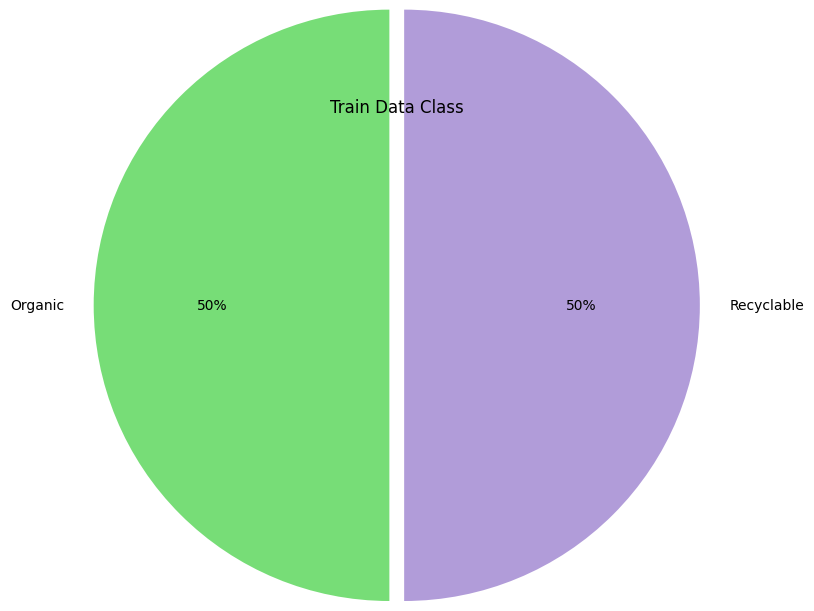

In [51]:
# Pie Chart of Classes Distribution in Train Data
colors = ['#77dd77','#b19cd9']
plt.pie(train.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.0f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.title('Train Data Class')
plt.show()


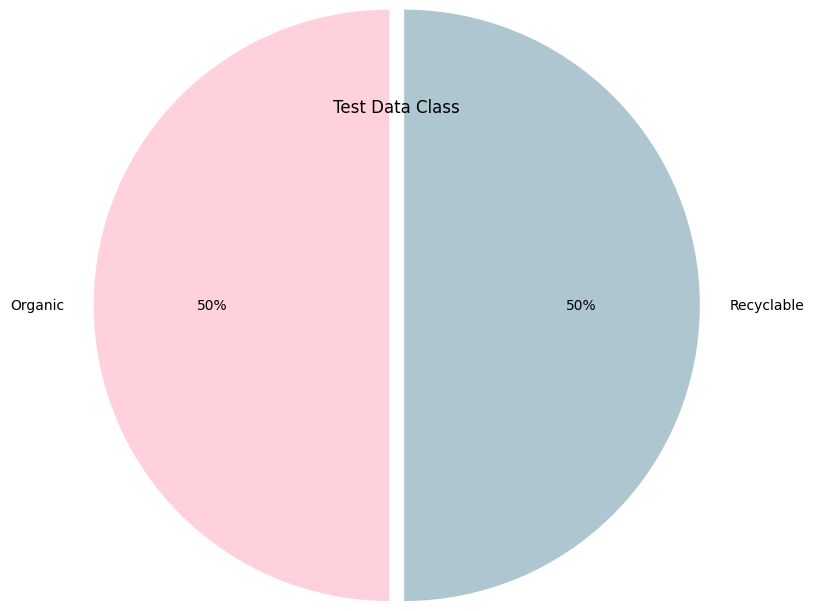

In [53]:
# Pie Chart of Classes Distribution in Test Data
colors = ['#FFD1DC','#AEC6CF']
plt.pie(test.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.0f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.title('Test Data Class')
plt.show()

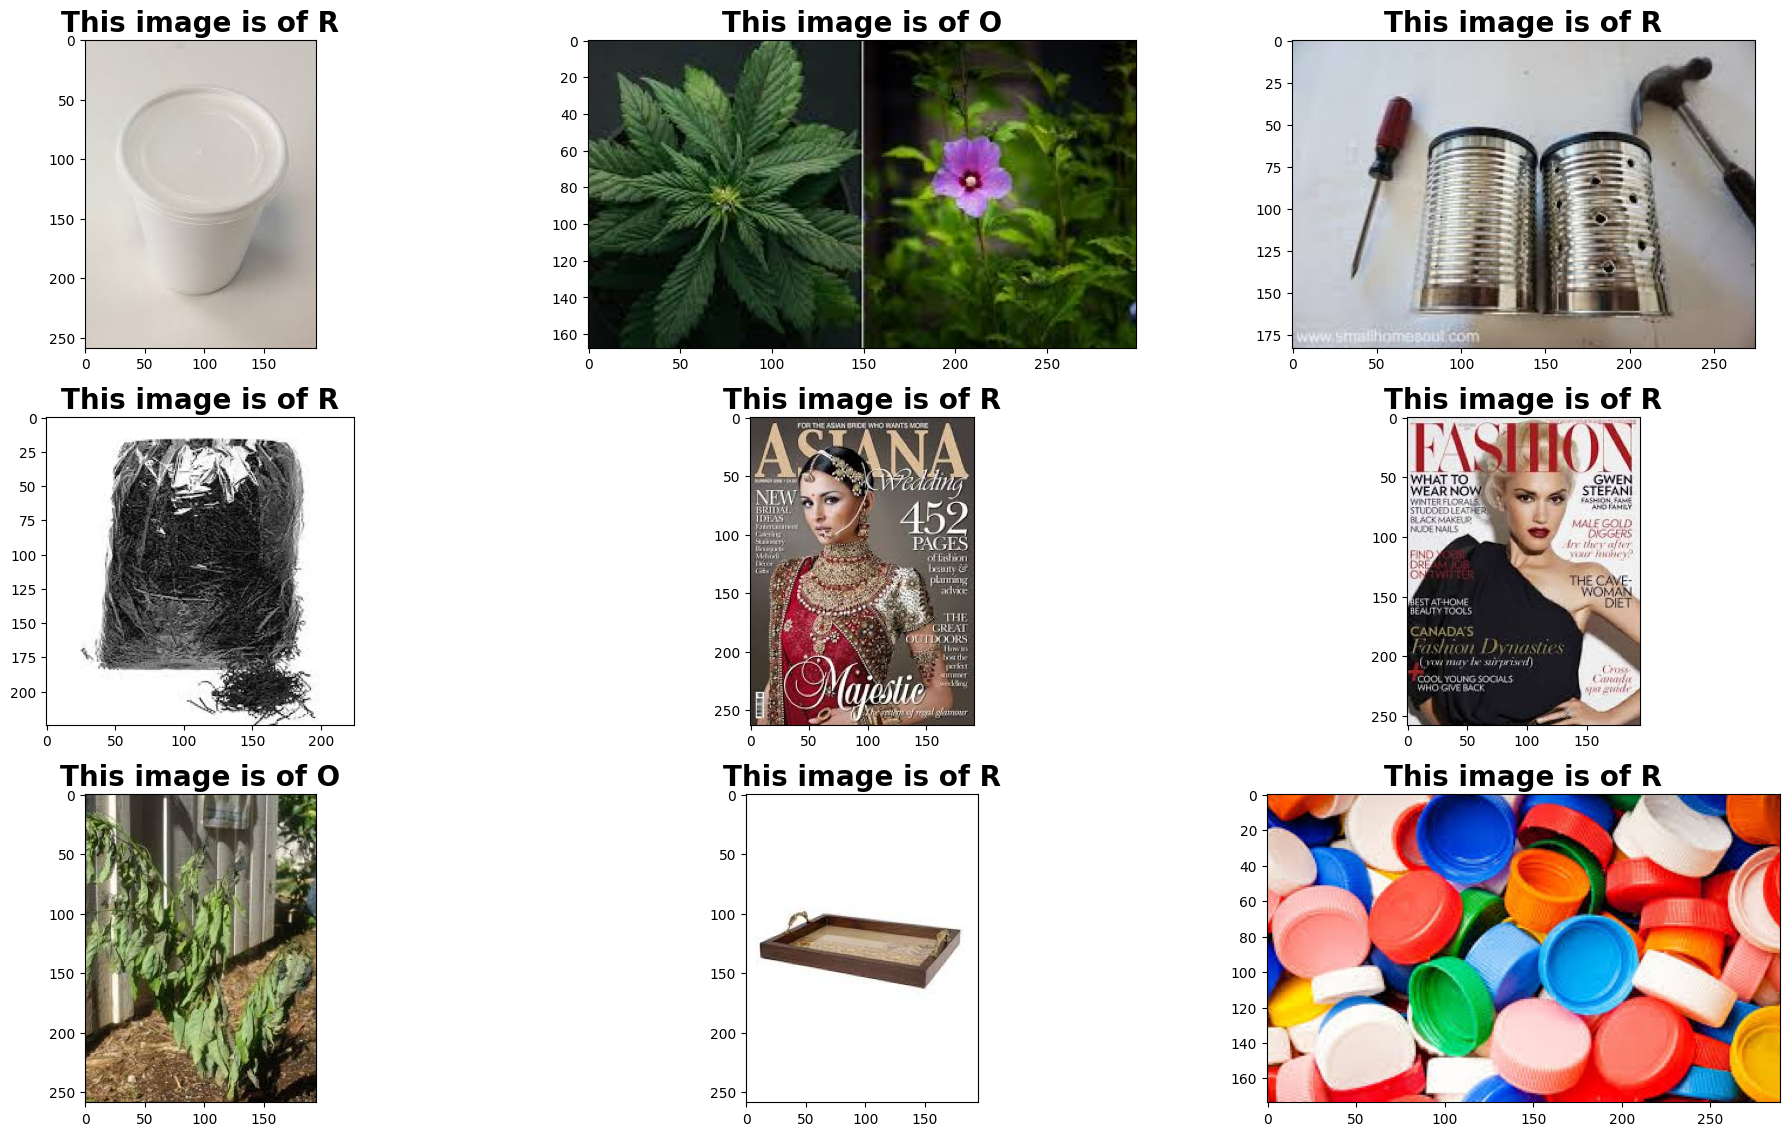

In [61]:
# Sample Images from Train Data
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(train.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(train.image[index])
    plt.tight_layout()

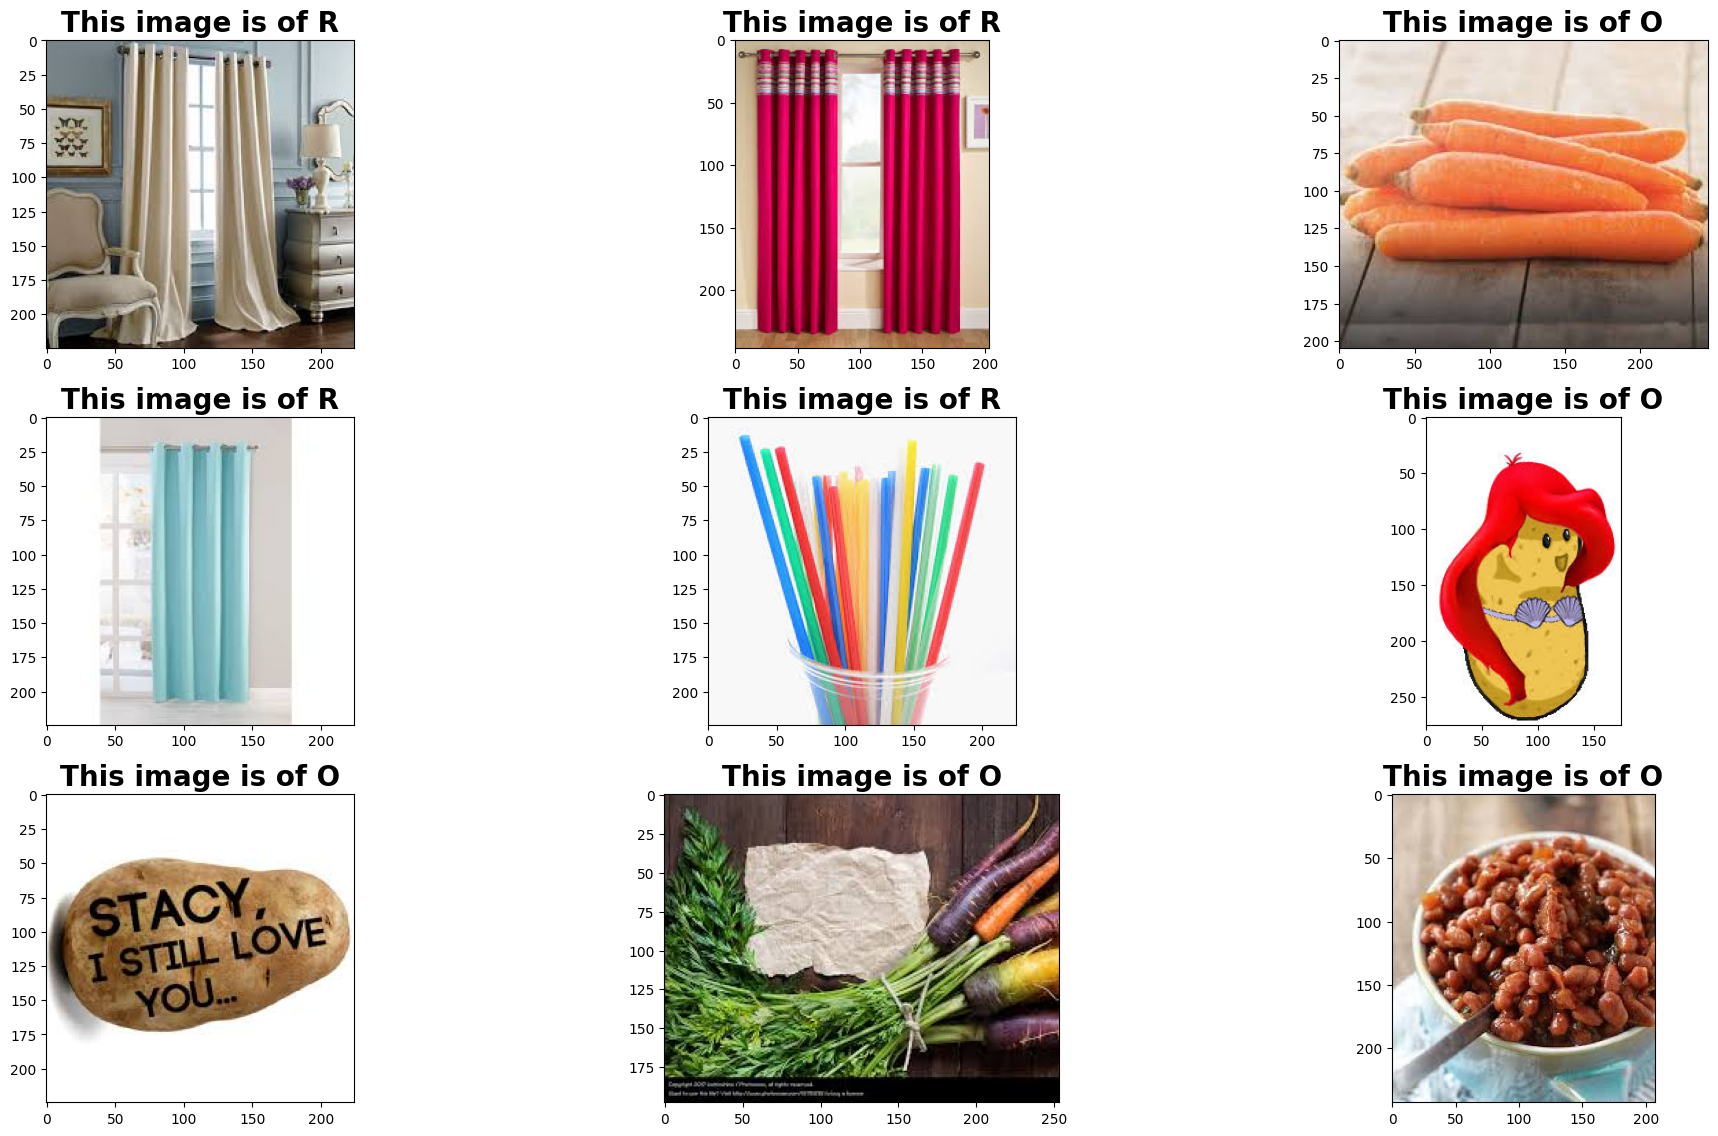

In [64]:
# Sample Images from Test Data
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(1000)
    plt.title('This image is of {0}'.format(test.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(test.image[index])
    plt.tight_layout()